In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.image as mpimg
import glob
import json
import os
import torch
import torch.nn as nn
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, sampler
import pandas as pd
import copy
from tqdm import tqdm
from joblib import Parallel, delayed
import subprocess
import sys
import os
# import the necessary packages
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
from skimage import io
from scipy import misc
import numpy as np
import argparse
from PIL import Image
import glob
from tqdm import tqdm
import os
from joblib import Parallel, delayed


In [4]:
SEGMENTATION_PATH = "/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/segmentation"
ATTRIBUTES_PATH = "/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/attributes"
IMAGE_PATH = "/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/images"

BASE_RESIZED_PATH = "/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix"

SEGMENTATION_RESIZED_PATH = os.path.join(BASE_RESIZED_PATH, "segmentation_resized")
ATTRIBUTES_RESIZED_PATH = os.path.join(BASE_RESIZED_PATH, "attribute_resized")
IMAGE_RESIZED_PATH = os.path.join(BASE_RESIZED_PATH, "image_resized")

SEGMENTATION_512p_PATH = os.path.join(BASE_RESIZED_PATH, "seg_512p")
ATTRIBUTES_512p_PATH = os.path.join(BASE_RESIZED_PATH, "attribute_512p")
IMAGES_512p_PATH = os.path.join(BASE_RESIZED_PATH, "images_512p")


INSTANCE_MAP_NO_BORDER_PATH = os.path.join(BASE_RESIZED_PATH, "instance_map_no_border")
INSTANCE_MAP_PATH = os.path.join(BASE_RESIZED_PATH, "instance_map")

os.makedirs(SEGMENTATION_RESIZED_PATH, exist_ok=True)
os.makedirs(ATTRIBUTES_RESIZED_PATH, exist_ok=True)
os.makedirs(IMAGE_RESIZED_PATH, exist_ok=True)

os.makedirs(IMAGES_512p_PATH, exist_ok=True)
os.makedirs(SEGMENTATION_512p_PATH, exist_ok=True)
os.makedirs(ATTRIBUTES_512p_PATH, exist_ok=True)
os.makedirs(INSTANCE_MAP_PATH, exist_ok=True)
os.makedirs(INSTANCE_MAP_NO_BORDER_PATH, exist_ok=True)




In [5]:
def process_items(item, to_dir):
    name = item.split("/")[-1]
    to_dir_name = os.path.join(to_dir, name)
    cmd = "convert {} -resize 1024x512 -size 1024x512 xc:red +swap -gravity center -composite {}"
    cmd_formatted = cmd.format(item, to_dir_name)
    subprocess.run(cmd_formatted.split(), capture_output=True).check_returncode()

def process_items_512p(item, to_dir):
    name = item.split("/")[-1]
    to_dir_name = os.path.join(to_dir, name)
    cmd = "convert {} -resize 1024x512 {}"
    cmd_formatted = cmd.format(item, to_dir_name)
    subprocess.run(cmd_formatted.split(), capture_output=True).check_returncode()

def process_items_instance_map(item, to_dir):
    name = item.split("/")[-1]
    to_dir_name = os.path.join(to_dir, name)
    cmd = "convert {} -resize 1024x512 -size 1024x512 xc:black +swap -gravity center -composite {}"
    cmd_formatted = cmd.format(item, to_dir_name)
    subprocess.run(cmd_formatted.split(), capture_output=True).check_returncode()

    
def resize_from_to(from_dir, to_dir, fnct, jobs_cnt=10):
    res = sorted(glob.glob(os.path.join(from_dir, "*.png")))
    Parallel(n_jobs=jobs_cnt)(delayed(fnct)(i, to_dir) for i in tqdm(res))
    

In [6]:
resize_from_to(SEGMENTATION_PATH, SEGMENTATION_RESIZED_PATH, process_items, 30)
resize_from_to(ATTRIBUTES_PATH, ATTRIBUTES_RESIZED_PATH, process_items, 30)
resize_from_to(IMAGE_PATH, IMAGE_RESIZED_PATH, process_items, 30)


100%|██████████| 3400/3400 [00:44<00:00, 76.16it/s]


[0 1 2]


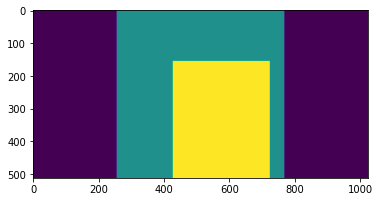

[0 1 2]


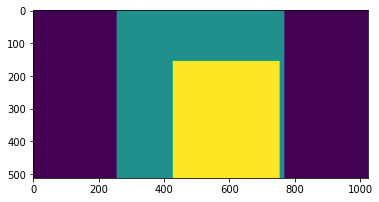

[0 1 2]


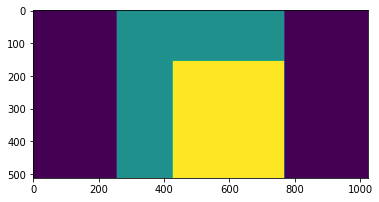

[0 1 2]


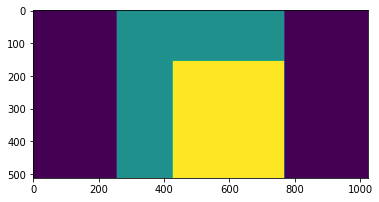

[0 1 2]


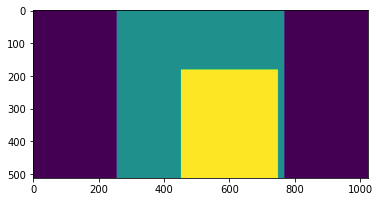

[0 1 2]


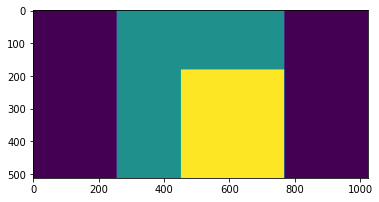

[0 1 2]


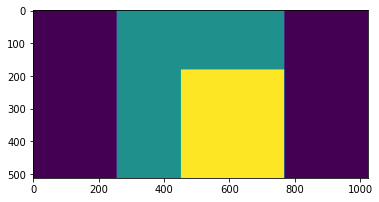

[0 1 2]


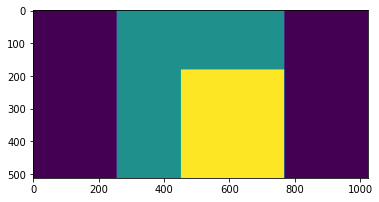

[0 1 2]


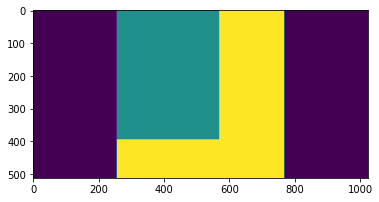

[0 1 2]


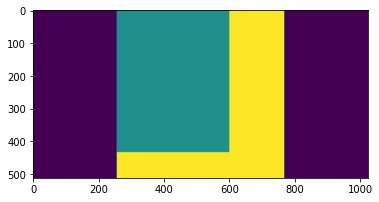

[0 1 2]


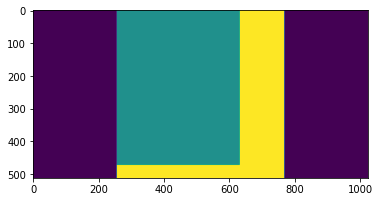

[0 1 2]


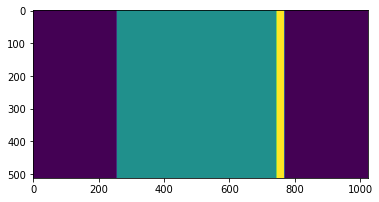

[0 1 2]


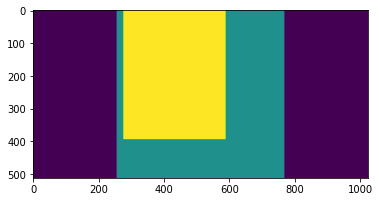

[0 1 2]


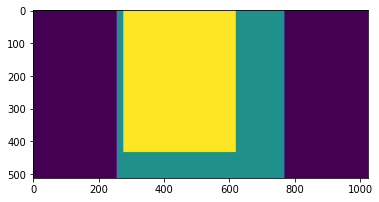

[0 1 2]


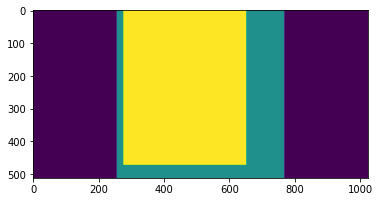

[0 1 2]


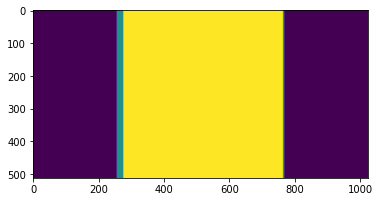

[0 1 2]


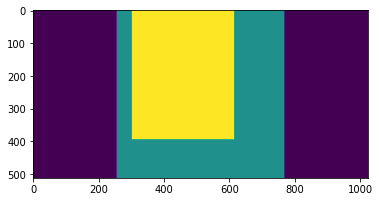

[0 1 2]


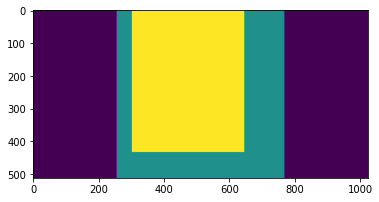

[0 1 2]


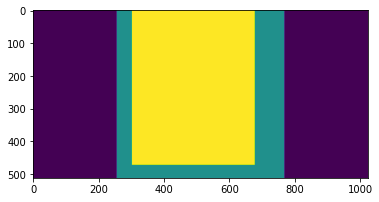

[0 1 2]


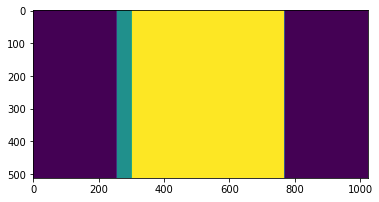

[0 1 2]


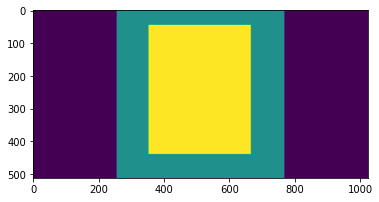

[0 1 2]


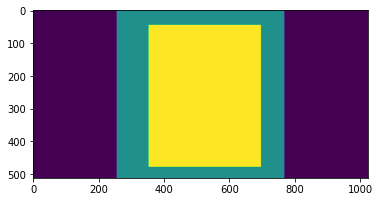

[0 1 2]


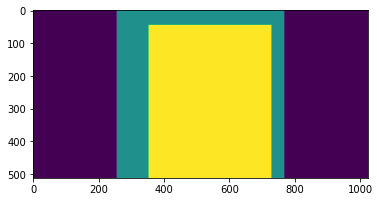

[0 1 2]


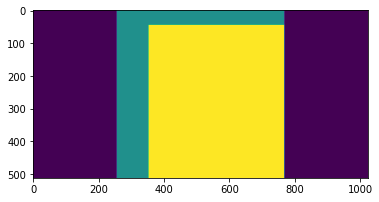

[0 1 2]


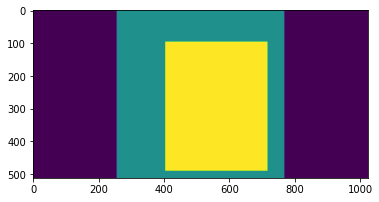

[0 1 2]


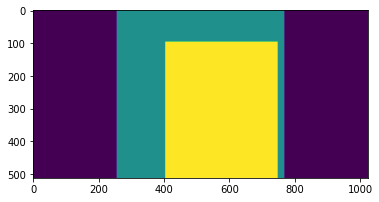

[0 1 2]


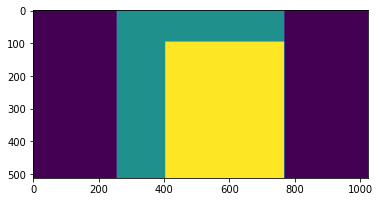

[0 1 2]


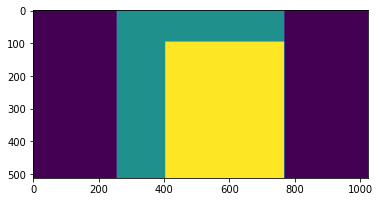

[0 1 2]


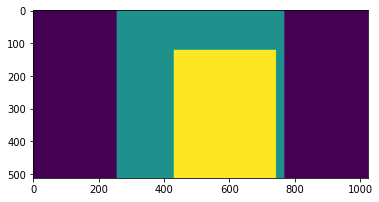

[0 1 2]


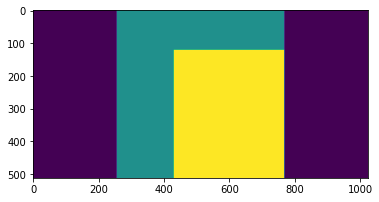

[0 1 2]


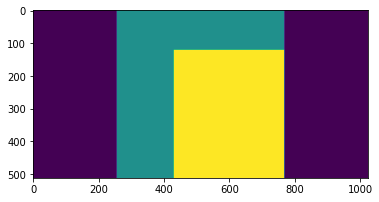

[0 1 2]


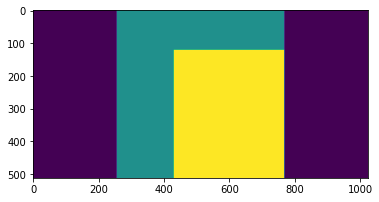

[0 1 2]


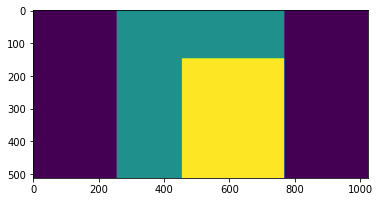

[0 1 2]


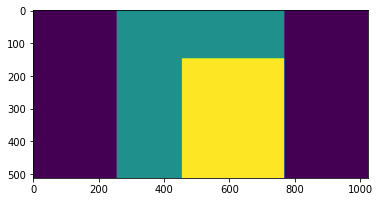

[0 1 2]


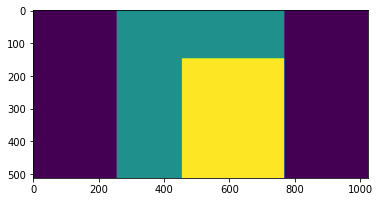

[0 1 2]


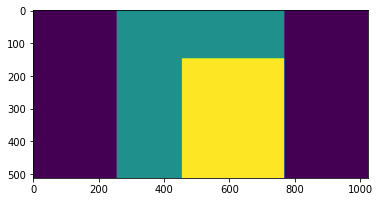

[0 1 2]


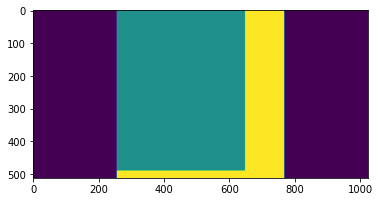

[0 1 2]


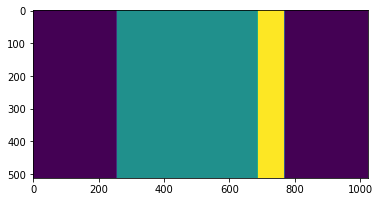

[0 1 2]


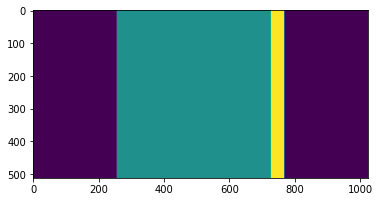

[0 1]


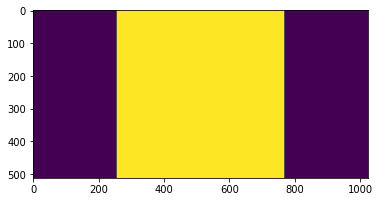

[0 1 2]


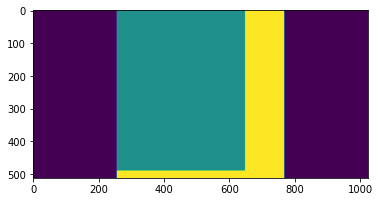

[0 1 2]


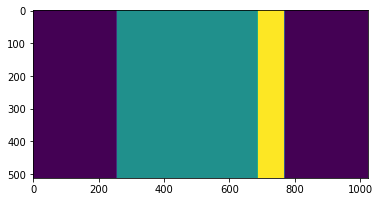

[0 1 2]


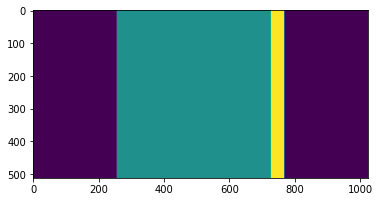

[0 1]


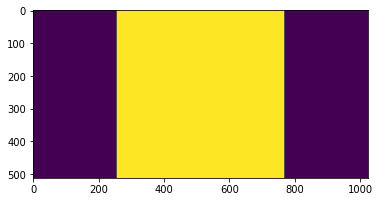

[0 1 2]


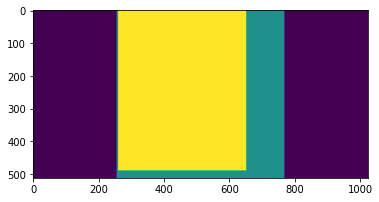

[0 1 2]


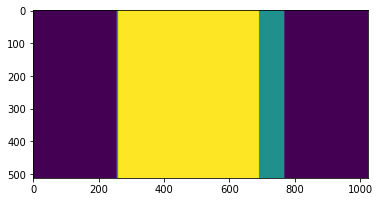

[0 1 2]


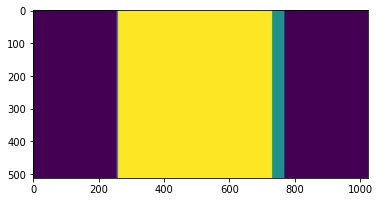

[0 1 2]


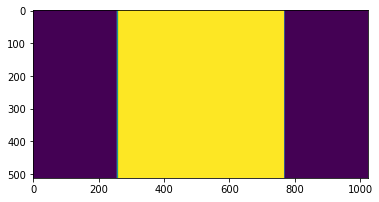

[0 1 2]


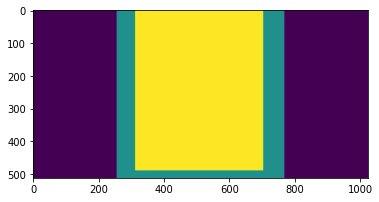

[0 1 2]


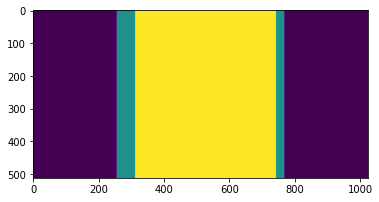

[0 1 2]


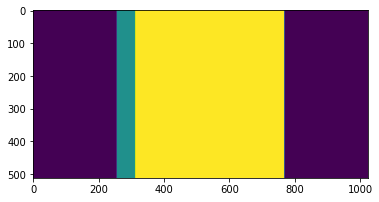

[0 1 2]


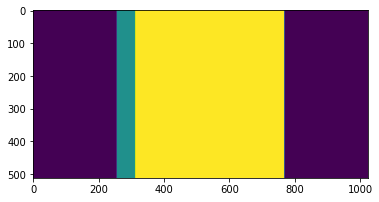

[0 1 2]


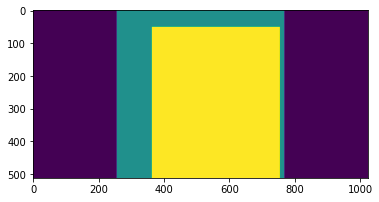

[0 1 2]


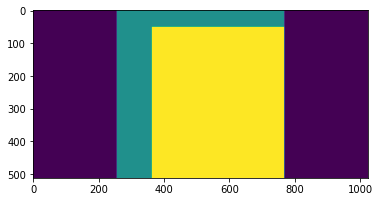

[0 1 2]


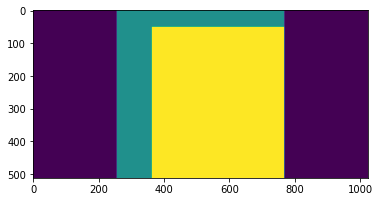

[0 1 2]


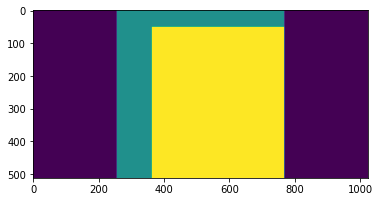

[0 1 2]


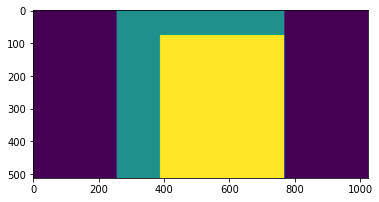

[0 1 2]


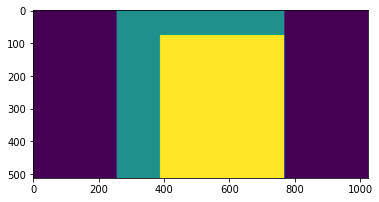

[0 1 2]


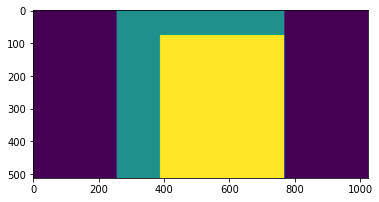

[0 1 2]


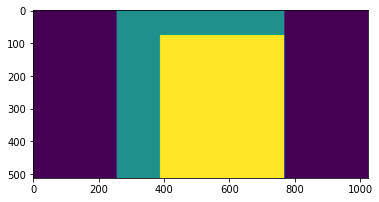

[0 1 2]


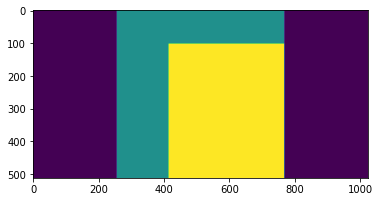

[0 1 2]


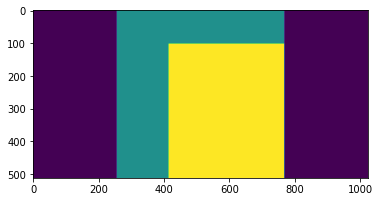

[0 1 2]


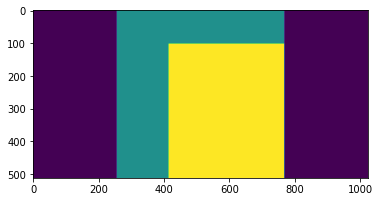

[0 1 2]


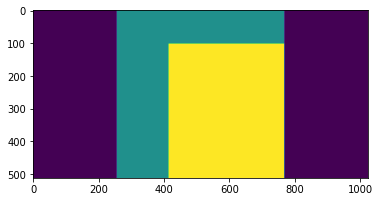

[0 1 2]


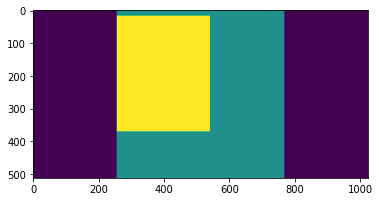

[0 1 2]


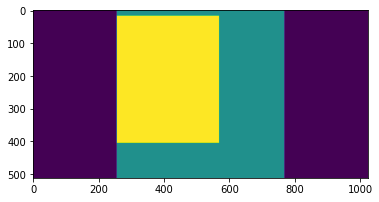

[0 1 2]


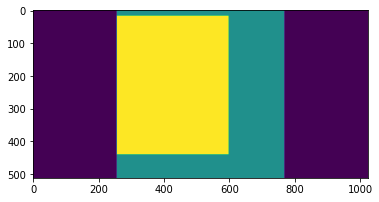

[0 1 2]


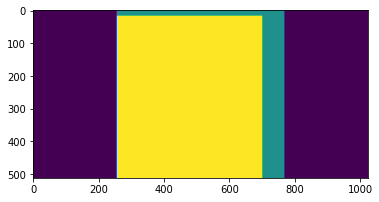

[0 1 2]


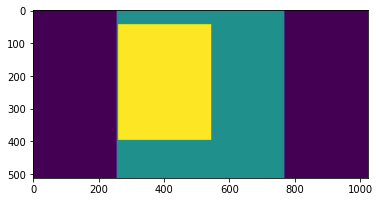

[0 1 2]


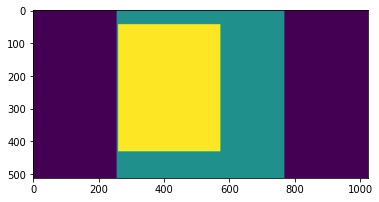

[0 1 2]


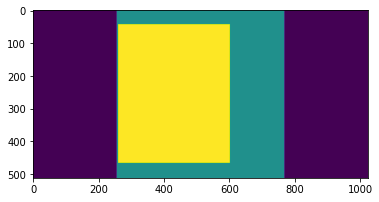

[0 1 2]


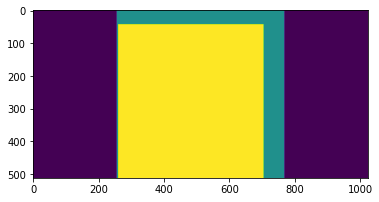

[0 1 2]


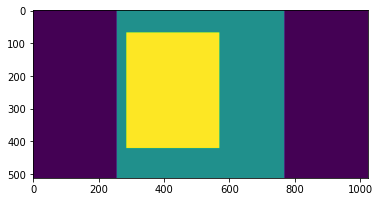

[0 1 2]


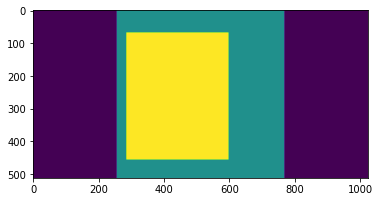

[0 1 2]


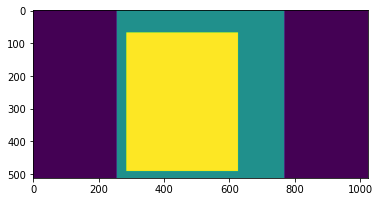

[0 1 2]


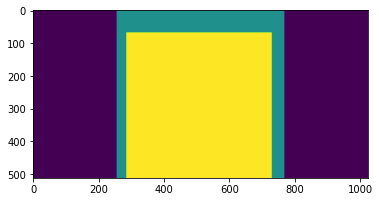

[0 1 2]


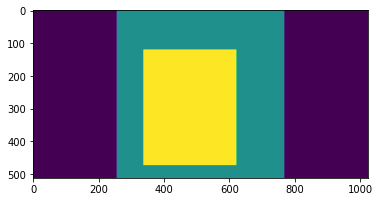

[0 1 2]


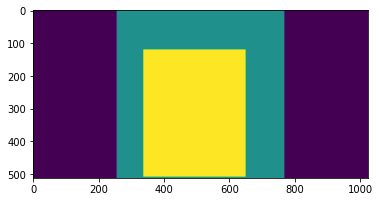

[0 1 2]


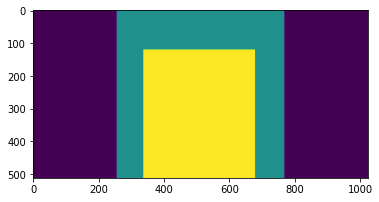

[0 1 2]


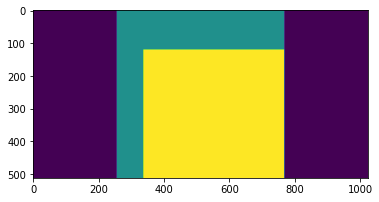

[0 1 2]


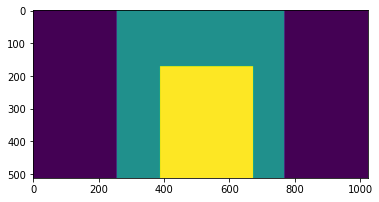

[0 1 2]


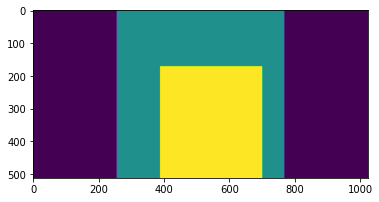

[0 1 2]


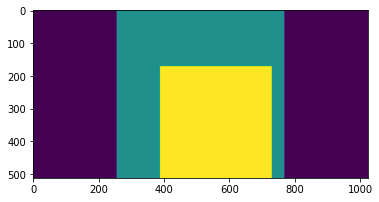

[0 1 2]


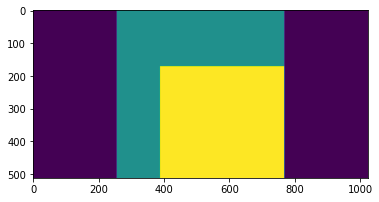

[0 1 2]


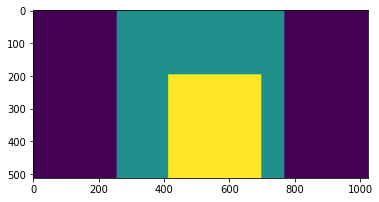

[0 1 2]


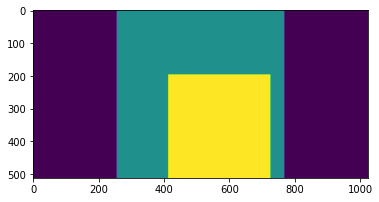

[0 1 2]


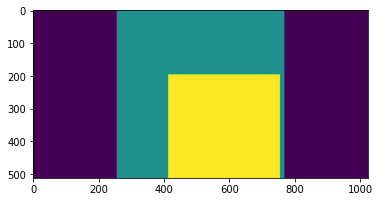

[0 1 2]


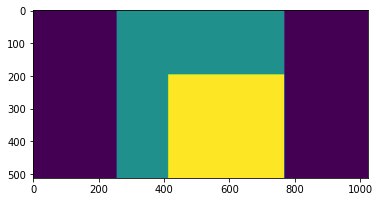

[0 1 2]


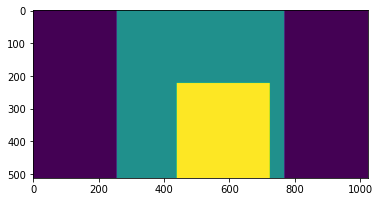

[0 1 2]


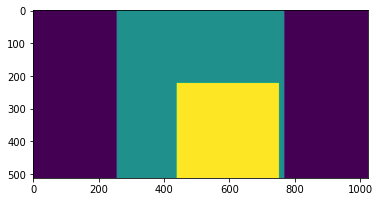

[0 1 2]


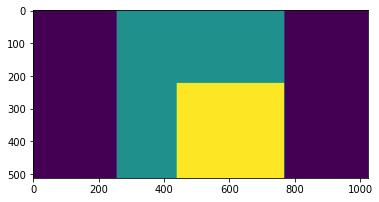

[0 1 2]


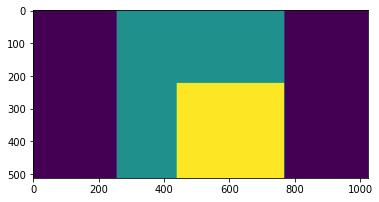

[0 1 2]


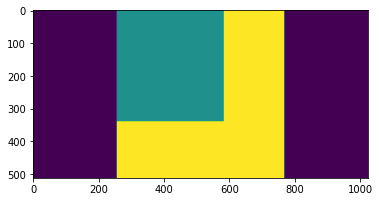

[0 1 2]


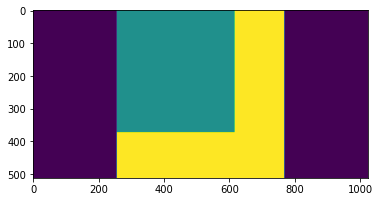

[0 1 2]


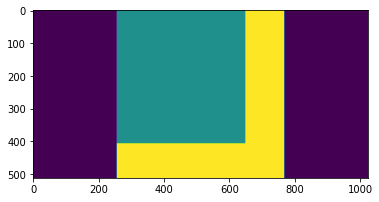

[0 1 2]


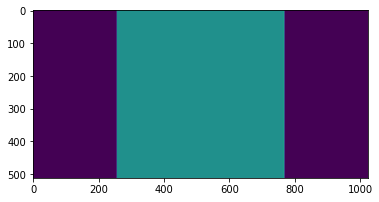

[0 1 2]


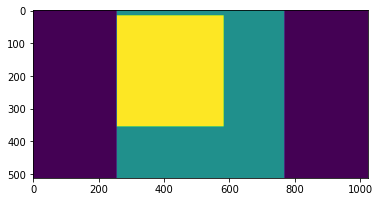

[0 1 2]


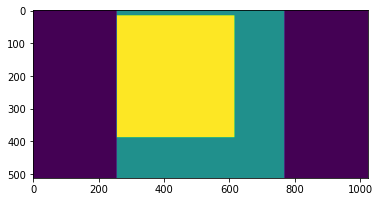

[0 1 2]


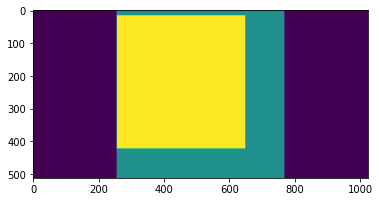

[0 1 2]


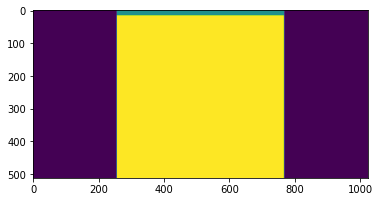

In [8]:
d = sorted(glob.glob(os.path.join(SEGMENTATION_RESIZED_PATH, "*.png")))
for i in range(100):
    img = np.array(Image.open(d[i]))
    print(np.unique(img))
    plt.imshow(img)
    plt.show()
    np.unique(img)


In [9]:
resize_from_to(SEGMENTATION_RESIZED_PATH, SEGMENTATION_512p_PATH, process_items_512p, 30)
resize_from_to(ATTRIBUTES_RESIZED_PATH, ATTRIBUTES_512p_PATH, process_items_512p, 30)
resize_from_to(IMAGE_RESIZED_PATH, IMAGES_512p_PATH, process_items_512p, 30)


100%|██████████| 3400/3400 [00:42<00:00, 80.60it/s]


In [11]:
def process_segmentation_map(base_path):
    atri_dir = os.path.join(base_path, 'attribute_resized/')
    mask_dir = os.path.join(base_path, 'segmentation_resized/')
    output_dir = os.path.join(base_path, 'semantic_map/')

    print(atri_dir)
    print(mask_dir)
    print(output_dir)

    file_name_arr = []  # [ISIC_00000, ISIC_000001, ISIC_000003, ...]
    for file in glob.glob(atri_dir + '*.png'):
        temp = file.split('/')[-1].split('_')
        file_name = temp[0] + '_' + temp[1]
        if file_name not in file_name_arr:
            file_name_arr.append(file_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    cnt = 0
    file_name_arr = sorted(file_name_arr)
    # file_name_arr = file_name_arr[0:17]
    for family in tqdm(file_name_arr):
        # Create a zero filled base image
        for i, file in enumerate(glob.glob(atri_dir + family + '*.png')):
            # Read the image
            #print(file)
            read_image = np.array(Image.open(file))
            assert read_image.shape == (512, 1024)
            assert len(np.unique(read_image)) >= 2
            border_color = read_image[0, 0]
            read_image[read_image == border_color] = 0
            read_image[read_image != 2] = 0
            read_image[read_image == 2] = 1
            
            if i == 0:
                mask = np.array(Image.open(mask_dir + family + '_segmentation.png'))
                assert mask.shape == (512, 1024)
                assert len(np.unique(mask)) >= 2
                
                base_image = np.ones(read_image.shape)  # Healthy Skin is 1
                border_mask_color = mask[0, 0]
                base_image[mask == border_mask_color] = 0
                mask[mask == border_mask_color] = 0
                mask[mask != 2] = 0
                mask[mask == 2] = 1
                
                base_image += mask  # Common Lesion is 2

            
            type_file = file.split('/')[-1].split('_')[3]
            
            if type_file == 'pigment':  # 3
                base_image += read_image
                if base_image[base_image > 3].any():
                    base_image[base_image > 3] = 3
            elif type_file == 'negative':  # 4
                base_image += read_image * 2
                if base_image[base_image > 4].any():
                    base_image[base_image > 4] = 4
            elif type_file.startswith('streaks'):  # 5
                base_image += read_image * 3
                if base_image[base_image > 5].any():
                    base_image[base_image > 5] = 5
            elif type_file == 'milia':  # 6
                base_image += read_image * 4
                if base_image[base_image > 6].any():
                    base_image[base_image > 6] = 6
            elif type_file.startswith('globules'):  # 7
                base_image += read_image * 5
                if base_image[base_image > 7].any():
                    base_image[base_image > 7] = 7
            else:
                print('ERROR: Invalid File Found!!!!')
        #plt.clf()
        #plt.imshow(base_image)
        #plt.show()


        #break
        Image.fromarray((base_image).astype(np.uint8)).save(output_dir + family + '_semantic.png')
        #print(np.unique((base_image).astype(np.uint8)))
        #plt.imshow(np.array(Image.open(output_dir + family + '_semantic.png')))                          
        #plt.show()
        #cnt += 1
        #if cnt == 1000:
        #    break
        #toimage(base_image, cmin=0, cmax=255).save(output_dir + family + '_semantic.png')

process_segmentation_map("/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/")


/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/attribute_resized/
/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/segmentation_resized/
/mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/semantic_map/


100%|██████████| 3400/3400 [07:51<00:00,  7.22it/s]  


In [12]:
# Directories
atri_dir = os.path.join(BASE_RESIZED_PATH, 'attribute_512p/')
image_dir = os.path.join(BASE_RESIZED_PATH, 'images_512p/')
segmentation_dir = os.path.join(BASE_RESIZED_PATH, 'seg_512p/')
output_dir = os.path.join(BASE_RESIZED_PATH, 'instance_map_no_border/')
print("atri_dir", atri_dir)
print("image_dir", image_dir)
print("segmentation_dir", segmentation_dir)
print("output_dir", output_dir)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_name_arr = []
for file in glob.glob(atri_dir + '*.png'):
    temp = file.split('/')[-1].split('_')
    file_name = temp[0] + '_' + temp[1]
    if file_name not in file_name_arr:
        file_name_arr.append(file_name)


def create_instance_map(family):
    # Create a zero filled base image
    # Load original image
    image = np.array(Image.open(image_dir + family + '_image.png'))
    #print(image.shape)
    instance_map = np.zeros(image.shape[:2], dtype=int)
    segments = slic(img_as_float(image), n_segments=1000,
                    slic_zero=True, compactness=1, sigma=2)

    for i, file in enumerate(glob.glob(atri_dir + family + '*.png')):
        # Read Mask
        mask = np.array(Image.open(file))
        #print(mask.shape)
        border_color = mask[0, 0]
        mask[mask == border_color] = 0
        mask[mask != 2] = 0
        mask[mask == 2] = 1
        type_file = file.split('/')[-1].split('_')[3]
        if i == 0:
            segmentation = np.array(Image.open(segmentation_dir + family + '_segmentation.png'))
            border_color = segmentation[0, 0]
            segmentation[segmentation == border_color] = 0
            segmentation[segmentation != 2] = 0
            segmentation[segmentation == 2] = 1


            last_lesion = 2000
            last_background = 1000
            for v in np.unique(segments):
                union = segmentation[segments == v]
                if float(len(union[union > 0])) / float(len(union)) > 0.5:
                    instance_map[segments == v] = last_lesion
                    last_lesion += 1
                else:
                    instance_map[segments == v] = last_background
                    last_background += 1

        if type_file == 'pigment':  # 3
            last = 3000
        elif type_file == 'negative':  # 4
            last = 4000
        elif type_file.startswith('streaks'):  # 5
            last = 5000
        elif type_file == 'milia':  # 6
            last = 6000
        elif type_file.startswith('globules'):  # 7
            last = 7000
        else:
            print('ERROR: Invalid File Found!!!!')
        # For each superpixel in the selected mask,
        # update the pixel values incrementing the value for each superpixel found.
        for v in np.unique(segments):
            union = mask[segments == v]
            if float(len(union[union > 0])) / float(len(union)) > 0.5:
                instance_map[segments == v] = last
                last += 1
    instance_map = instance_map.astype(np.uint32)
    im = Image.fromarray(instance_map)
    im.save(output_dir + family + '_instance.png')
    #plt.imshow(instance_map)
    #plt.show()

#cnt = 0  
#for f in file_name_arr: 
#    create_instance_map(f)
#    cnt += 1
#    if cnt == 100:
#        break
Parallel(n_jobs=30)(delayed(create_instance_map)(family) for family in tqdm(file_name_arr))


atri_dir /mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/attribute_512p/
image_dir /mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/images_512p/
segmentation_dir /mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/seg_512p/
output_dir /mnt/tank/scratch/nduginets/images/noise_bboxes_v2/pix2pix/instance_map_no_border/


100%|██████████| 3400/3400 [27:48<00:00,  2.04it/s]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [13]:
resize_from_to(INSTANCE_MAP_NO_BORDER_PATH, INSTANCE_MAP_PATH, process_items_instance_map, 30)

100%|██████████| 3400/3400 [00:20<00:00, 169.93it/s]


nduginets@turing:/mnt/tank/scratch/nduginets/images/noise_bboxes/pix2pix$ cp ./semantic_map/* /mnt/tank/scratch/nduginets/images/pix2pix_datasets/bb_dataset_based_on_noise/test_label/

nduginets@turing:/mnt/tank/scratch/nduginets/images/noise_bboxes/pix2pix$ cp ./instance_map/* /mnt/tank/scratch/nduginets/images/pix2pix_datasets/bb_dataset_based_on_noise/test_inst/

python3 test.py --name label2skin --checkpoints_dir /mnt/tank/scratch/nduginets/images/pix2pix_checkpoints/boxed_checkpoints/ --dataroot /mnt/tank/scratch/nduginets/images/pix2pix_datasets/bb_dataset_based_on_noise --label_nc 8 --how_many 100500 --gpu_id 1 --results_dir /mnt/tank/scratch/nduginets/images/pix2pix_datasets/pix2pix_result_boxed_with_ins